In [76]:
import numpy as np
import pandas as pd
import json

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.quantization
from torchvision.models.quantization import resnet18

In [78]:
# Set the quantization backend
torch.backends.quantized.engine = 'qnnpack' 

# Load a pretrained quantized model
model = resnet18(pretrained=True, quantize=True)

# Function to capture intermediate outputs and prepare for quantization
def get_intermediate_outputs(model, input_data):
    intermediate_outputs = []

    def hook_fn(module, input, output):
        intermediate_outputs.append(input[0])
        intermediate_outputs.append(output)

    hooks = []
    for layer in model.children():
        hook = layer.register_forward_hook(hook_fn)
        hooks.append(hook)

    # Forward pass
    with torch.no_grad():
        model(input_data)

    # Remove hooks
    for hook in hooks:
        hook.remove()

    return intermediate_outputs

# Quantize and save all tensors
def save_tensor_as_list(tensor, filename):
    tensor_list = tensor.cpu().numpy().tolist()  # Convert tensor to list
    with open(filename, 'w') as f:
        json.dump(tensor_list, f)

RuntimeError: Quantized backend not supported 

In [66]:
class CompTensor:
    def __init__(self, tensor):
        self.tensor = tensor
        self.shape = tensor.shape
        self.flat = tensor.flatten()

    def update_tensor(self):
        # update tensor with new values from self.flatten
        self.tensor = self.flatten.reshape(self.shape)
        
    def update_flatten(self):
        # update flatten with new values from self.tensor
        self.flat = self.tensor.flatten()
        
    def to(self, type):
        self.tensor = self.tensor.to(type)
        self.update_flatten()
        
        return self

In [67]:
# Instantiate the model
model = BigModel()

# Define an input tensor with appropriate shape
input_tensor = torch.randn(1, 3, 224, 224)  # For a single image of size 224x224 with 3 channels (RGB)

# Capture intermediate outputs
intermediate_outputs = get_intermediate_outputs(model, input_tensor)

# Include input_tensor in the tensors to be quantized
all_tensors = intermediate_outputs

# convert all tensors to CompTensor
all_tensors = [CompTensor(tensor) for tensor in all_tensors]

In [64]:
min(all_tensors[1].flat)

tensor(-3.1523)

# Generating Symbol Table

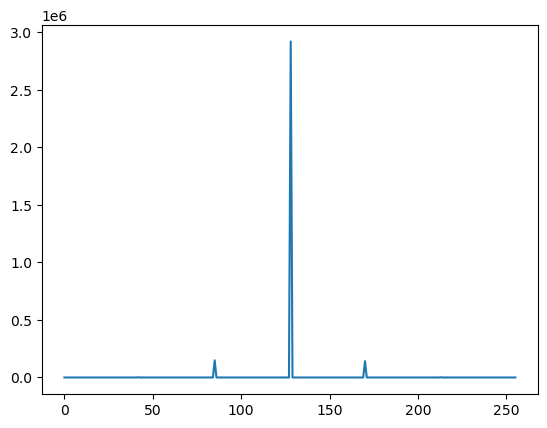

In [68]:
# Take the first tensor and prep the symbols
inp = all_tensors[1]
inp = inp.to(torch.int8)

# get a histogram of the tensor
n_buckets = 2**8
hist, bin_edges = np.histogram(inp.flat, bins=n_buckets)

# plot the histogram
import matplotlib.pyplot as plt
plt.plot(hist)
plt.show()

In [72]:
inp.flat.max()

tensor(3, dtype=torch.int8)

In [58]:
# Create symbol table with equal distribution
n_symbols = 2**8

sym_table = np.linspace(min(inp.flat), max(inp.flat), n_symbols)
sym_table = np.column_stack((sym_table,hist))

In [59]:
sym_table

array([[-3.37787151e+00,  1.00000000e+00],
       [-3.35215056e+00,  0.00000000e+00],
       [-3.32642961e+00,  0.00000000e+00],
       [-3.30070866e+00,  0.00000000e+00],
       [-3.27498771e+00,  0.00000000e+00],
       [-3.24926676e+00,  0.00000000e+00],
       [-3.22354580e+00,  0.00000000e+00],
       [-3.19782485e+00,  1.00000000e+00],
       [-3.17210390e+00,  0.00000000e+00],
       [-3.14638295e+00,  0.00000000e+00],
       [-3.12066200e+00,  0.00000000e+00],
       [-3.09494105e+00,  0.00000000e+00],
       [-3.06922009e+00,  0.00000000e+00],
       [-3.04349914e+00,  0.00000000e+00],
       [-3.01777819e+00,  0.00000000e+00],
       [-2.99205724e+00,  1.00000000e+00],
       [-2.96633629e+00,  2.00000000e+00],
       [-2.94061534e+00,  1.00000000e+00],
       [-2.91489438e+00,  1.00000000e+00],
       [-2.88917343e+00,  0.00000000e+00],
       [-2.86345248e+00,  1.00000000e+00],
       [-2.83773153e+00,  3.00000000e+00],
       [-2.81201058e+00,  6.00000000e+00],
       [-2.